In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import joblib

In [26]:
# Load the dataset
df = pd.read_csv("irrigation_machine.csv")


In [27]:
# first 5 rows to be printed, df.tail()
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [29]:
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [30]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_0,2000.0,1.4370,1.321327,0.0,0.0,1.0,2.0,8.0
sensor_1,2000.0,1.6590,1.338512,0.0,1.0,1.0,2.0,9.0
sensor_2,2000.0,2.6545,1.699286,0.0,1.0,2.0,4.0,10.0
sensor_3,2000.0,2.6745,1.855875,0.0,1.0,2.0,4.0,11.0
sensor_4,2000.0,2.8875,1.816451,0.0,2.0,3.0,4.0,12.0
sensor_5,2000.0,1.4110,1.339394,0.0,0.0,1.0,2.0,7.0
sensor_6,2000.0,3.3155,2.206444,0.0,2.0,3.0,5.0,13.0
sensor_7,2000.0,4.2015,2.280241,0.0,3.0,4.0,6.0,12.0
sensor_8,2000.0,1.2140,1.386782,0.0,0.0,1.0,2.0,8.0
sensor_9,2000.0,1.9010,1.518668,0.0,1.0,2.0,3.0,9.0


In [32]:

X = df.iloc[:, 0:20]   


y = df.iloc[:, 20:]

In [33]:
X.sample(20).T

,913,792,1264,1541,269,124,983,684,821,413,768,661,974,1792,676,829,478,1341,1011,1808
sensor_0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,2.0,1.0,2.0,1.0
sensor_1,1.0,1.0,0.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,5.0,4.0,4.0,1.0,1.0
sensor_2,4.0,3.0,1.0,0.0,1.0,5.0,4.0,1.0,1.0,3.0,0.0,1.0,2.0,2.0,3.0,1.0,4.0,3.0,2.0,2.0
sensor_3,4.0,2.0,3.0,8.0,1.0,0.0,0.0,2.0,3.0,1.0,3.0,5.0,4.0,4.0,1.0,2.0,3.0,4.0,4.0,4.0
sensor_4,2.0,5.0,3.0,1.0,3.0,2.0,6.0,1.0,0.0,4.0,6.0,1.0,4.0,6.0,6.0,2.0,3.0,4.0,5.0,3.0
sensor_5,1.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0
sensor_6,3.0,7.0,5.0,3.0,3.0,3.0,7.0,2.0,2.0,7.0,3.0,2.0,1.0,5.0,2.0,5.0,2.0,1.0,1.0,4.0
sensor_7,5.0,5.0,3.0,5.0,4.0,3.0,4.0,5.0,8.0,4.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,4.0
sensor_8,1.0,1.0,1.0,2.0,1.0,5.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,2.0,1.0,2.0
sensor_9,1.0,3.0,2.0,3.0,1.0,1.0,1.0,3.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,1.0,4.0,2.0,2.0,2.0


In [34]:
y.sample(20).T

,1135,956,1883,1037,1449,1304,1079,587,1336,212,1305,724,66,142,467,1675,1121,1015,1899,338
parcel_0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1
parcel_1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,0
parcel_2,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [36]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [37]:
X

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,0.0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0


In [38]:
X.shape

(2000, 20)

In [39]:
y.shape

(2000, 3)

In [40]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.125     , 0.22222222, 0.1       , ..., 0.09090909, 0.9       ,
        0.28571429],
       [0.625     , 0.11111111, 0.3       , ..., 0.18181818, 0.2       ,
        1.        ],
       [0.375     , 0.11111111, 0.4       , ..., 0.27272727, 0.1       ,
        0.        ],
       ...,
       [0.125     , 0.33333333, 0.3       , ..., 0.36363636, 0.1       ,
        0.        ],
       [0.25      , 0.11111111, 0.        , ..., 0.        , 0.3       ,
        0.        ],
       [0.        , 0.11111111, 0.4       , ..., 0.45454545, 0.2       ,
        0.14285714]])

In [41]:
# -------------------------------
# STEP 3: TRAIN-TEST SPLIT
# -------------------------------

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600, 3), (400, 3))

In [43]:

# -------------------------------
# STEP 4: TRAIN CLASSIFIER
# -------------------------------

# Use MultiOutputClassifier to handle multi-label classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Custom hyperparameters for RandomForest
rf = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=10,             # Maximum depth of each tree
    min_samples_split=4,      # Minimum samples to split a node
    min_samples_leaf=2,       # Minimum samples per leaf
    max_features='sqrt',      # Number of features to consider at each split ('auto', 'sqrt', 'log2', or int)
    random_state=42,
    class_weight='balanced'
)

# Wrap it with MultiOutputClassifier
model = MultiOutputClassifier(rf)

# Train the model
model.fit(X_train, y_train)


,estimator,RandomForestC...ndom_state=42)
,n_jobs,None
,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,4
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [44]:
# -------------------------------
# STEP 5: EVALUATE MODEL
# -------------------------------

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns))

Classification Report:
              precision    recall  f1-score   support

    parcel_0       0.89      0.92      0.90       256
    parcel_1       0.93      0.95      0.94       304
    parcel_2       0.81      0.69      0.75        87

   micro avg       0.90      0.90      0.90       647
   macro avg       0.88      0.85      0.86       647
weighted avg       0.90      0.90      0.90       647
 samples avg       0.82      0.79      0.79       647



C:\Users\mumma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mumma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mumma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [45]:
print(df[['parcel_0', 'parcel_1', 'parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


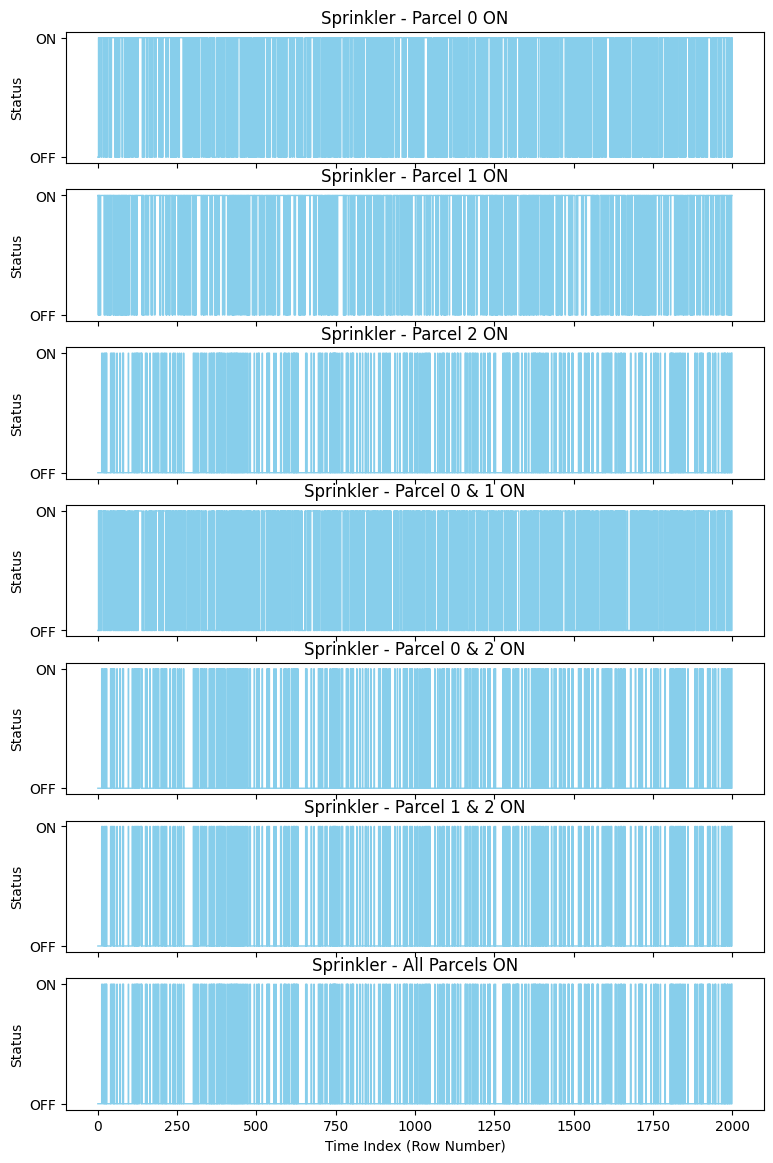

In [53]:
import matplotlib.pyplot as plt

# Define parcel activation conditions with descriptive labels
conditions = {
    "Parcel 0 ON": df['parcel_0'],
    "Parcel 1 ON": df['parcel_1'],
    "Parcel 2 ON": df['parcel_2'],
    "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
    "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
    "All Parcels ON": df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}

# Create vertically stacked subplots (one for each condition)
fig, axs = plt.subplots(nrows=len(conditions), figsize=(9,14), sharex=True)

# Loop through each condition to plot corresponding square wave
for ax, (title, condition) in zip(axs, conditions.items()):
    ax.step(df.index, condition.astype(int), where='post', linewidth=1, color='skyblue', label=title)
    ax.set_title(f"Sprinkler - {title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'])
   

# Label x-axis on the last subplot
axs[-1].set_xlabel("Time Index (Row Number)")

# Plot
plt.show()

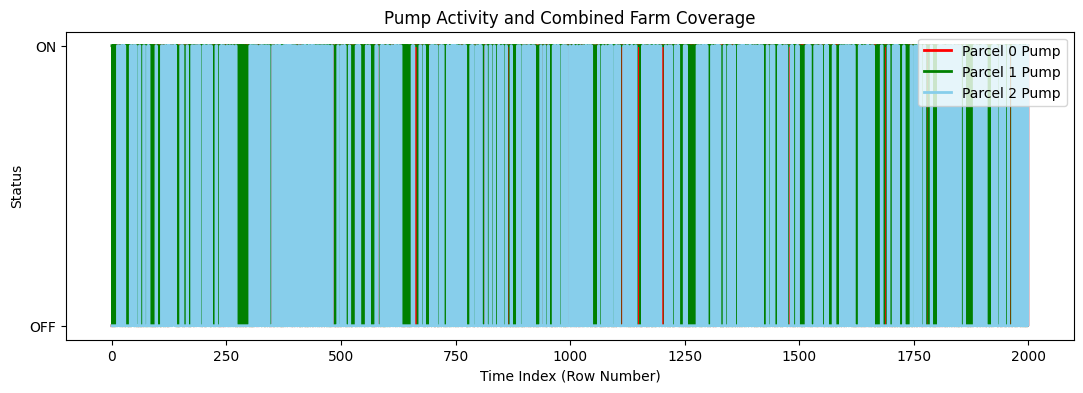

In [54]:
# Calculate combined activity of all pumps (overlap)
any_pump_on = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

plt.figure(figsize=(13, 4))

# Plot individual pump statuses
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='red')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='green')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='skyblue')

plt.title("Pump Activity and Combined Farm Coverage")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.show()


In [48]:
import joblib
from sklearn.pipeline import Pipeline

joblib.dump(model, "Farm_Irrigation_System.pkl")

['Farm_Irrigation_System.pkl']